In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
duomenys = pd.read_excel('namai.xlsx')

In [3]:
duomenys

,Kaina (Eur),Plotas (m2),Kambariai,Statybos metai
0,1116000,180,8,2002
1,860000,121,5,1992
2,818400,132,6,1987
3,1000000,156,7,2000
4,640000,118,5,1995
5,1010000,172,7,1998
6,600000,93,4,2015
7,700000,102,4,2014
8,1100000,149,7,2017
9,570000,93,5,1997


In [4]:
duomenys.describe()

,Kaina (Eur),Plotas (m2),Kambariai,Statybos metai
count,2.000000e+01,20.000000,20.000000,20.000000
mean,8.404700e+05,134.000000,5.850000,2000.900000
std,1.977988e+05,37.694059,1.954078,9.497368
min,5.700000e+05,80.000000,2.000000,1987.000000
25%,6.725000e+05,102.000000,4.000000,1996.500000
50%,8.342000e+05,124.000000,6.000000,1999.000000
75%,1.002500e+06,160.000000,7.000000,2005.000000
max,1.250000e+06,204.000000,9.000000,2017.000000


In [ ]:
#Skaičiavimai iš paskaitos, lyginamieji duomenys
#R-sq - 0.736, min P - 0.0765, max P - 0.098

In [5]:
X = duomenys[['Plotas (m2)', 'Kambariai', 'Statybos metai']]
Y = duomenys['Kaina (Eur)']

In [6]:
X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Kaina (Eur)   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     14.85
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           6.93e-05
Time:                        19:19:45   Log-Likelihood:                -258.45
No. Observations:                  20   AIC:                             524.9
Df Residuals:                      16   BIC:                             528.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -9.493e+06    5.4e+06     -1.757      0.098   -2.09e+07    1.96e+06
Plotas (m2)     3681.0491   1945.378      1.892      0.077    -442.968    7805.066
Kambariai       1.144e+04   3.76e+04      0.304      0.765   -6.84e+04    9.12e+04
Statybos metai  4884.3723   2701.731      1.808      0.089    -843.042    1.06e+04
==============================================================================
Omnibus:                        2.171   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.338   Jarque-Bera (JB):                1.768
Skew:                          -0.682   Prob(JB):                        0.413
Kurtosis:                       2.489   Cond. No.                     4.37e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.37e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#1 bandymas, NK - plotas ir kambariai
#R-sq - 0.682, min P - 0.121, max P - 0.628
#Matome, kad 'Statybos metai' kintamojo atmetimas turi neigiamus rezultatus 
#- sumažėja R-sq reikšmė bei padidėja P reikšmės

In [7]:
X = duomenys[['Plotas (m2)', 'Kambariai']]
Y = duomenys['Kaina (Eur)']

In [8]:
X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Kaina (Eur)   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     18.22
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           5.92e-05
Time:                        19:20:38   Log-Likelihood:                -260.31
No. Observations:                  20   AIC:                             526.6
Df Residuals:                      17   BIC:                             529.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.748e+05   1.03e+05      2.663      0.016    5.71e+04    4.92e+05
Plotas (m2)  3364.8256   2062.716      1.631      0.121    -987.126    7716.777
Kambariai    1.962e+04   3.98e+04      0.493      0.628   -6.43e+04    1.04e+05
==============================================================================
Omnibus:                        1.334   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.513   Jarque-Bera (JB):                0.822
Skew:                          -0.491   Prob(JB):                        0.663
Kurtosis:                       2.847   Cond. No.                         547.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#2 bandymas, NK - kambariai ir statybos metai
#matome, kad R-sq reikšmė - modelio tikslumas yra sumažėjęs
#?bei kintamojo kambariai p reikšmė yra nulinė

In [14]:
X = duomenys[['Kambariai', 'Statybos metai']]
Y = duomenys['Kaina (Eur)']

In [15]:
X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Kaina (Eur)   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     17.79
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           6.79e-05
Time:                        19:38:27   Log-Likelihood:                -260.47
No. Observations:                  20   AIC:                             526.9
Df Residuals:                      17   BIC:                             529.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -8.471e+06   5.77e+06     -1.468      0.160   -2.06e+07     3.7e+06
Kambariai       7.824e+04    1.4e+04      5.574      0.000    4.86e+04    1.08e+05
Statybos metai  4424.7160   2887.793      1.532      0.144   -1667.996    1.05e+04
==============================================================================
Omnibus:                        2.115   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.347   Jarque-Bera (JB):                1.400
Skew:                          -0.407   Prob(JB):                        0.497
Kurtosis:                       1.991   Cond. No.                     4.34e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.34e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
#3 bandymas, NK - plotas ir statybos metai
#R-sq reikšmė šį kartą labai panaši (beveik identiška) kaip pirminiame variante, visgi mažesnė,
#kintamojo 'plotas' p reikšmė įgauna nulinę reikšmę
#kintamasis 'statybos metai' taip pat sumažėjo (nežymiai)
#Taigi galima byloti, kad šis variantas, mano nuomone, yra priimtiniausias, 
#nes statistiškas reikšmingumas ženkliai padidėja, 
#o mes sumokame tik labai nedidelio modelio tikslumo sumažėjimu

In [9]:
X = duomenys[['Plotas (m2)','Statybos metai']]
Y = duomenys['Kaina (Eur)']

In [10]:
X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Kaina (Eur)   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     23.49
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           1.28e-05
Time:                        19:21:42   Log-Likelihood:                -258.51
No. Observations:                  20   AIC:                             523.0
Df Residuals:                      17   BIC:                             526.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -9.698e+06   5.22e+06     -1.859      0.080   -2.07e+07    1.31e+06
Plotas (m2)     4235.1398    657.491      6.441      0.000    2847.955    5622.324
Statybos metai  4983.1117   2609.513      1.910      0.073    -522.479    1.05e+04
==============================================================================
Omnibus:                        2.110   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.348   Jarque-Bera (JB):                1.721
Skew:                          -0.671   Prob(JB):                        0.423
Kurtosis:                       2.489   Cond. No.                     4.34e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.34e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [4]:
#Regresijos modelis su kaggle dataset
kaggle_duomenys = pd.read_csv('Daegu_Real_Estate_Data.csv')

In [5]:
kaggle_duomenys

,SalePrice,YearBuilt,YrSold,MonthSold,Size(sqf),Floor,HallwayType,HeatingType,AptManageType,N_Parkinglot(Ground),...,N_FacilitiesNearBy(Mall),N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(Park),N_SchoolNearBy(Elementary),N_SchoolNearBy(Middle),N_SchoolNearBy(High),N_SchoolNearBy(University),N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total)
0,141592,2006,2007,8,814,3,terraced,individual_heating,management_in_trust,111.0,...,1.0,1.0,0.0,3.0,2.0,2.0,2.0,5,6.0,9.0
1,51327,1985,2007,8,587,8,corridor,individual_heating,self_management,80.0,...,1.0,2.0,1.0,2.0,1.0,1.0,0.0,3,12.0,4.0
2,48672,1985,2007,8,587,6,corridor,individual_heating,self_management,80.0,...,1.0,2.0,1.0,2.0,1.0,1.0,0.0,3,12.0,4.0
3,380530,2006,2007,8,2056,8,terraced,individual_heating,management_in_trust,249.0,...,1.0,0.0,0.0,2.0,2.0,1.0,2.0,5,3.0,7.0
4,221238,1993,2007,8,1761,3,mixed,individual_heating,management_in_trust,523.0,...,1.0,5.0,0.0,4.0,3.0,5.0,5.0,4,14.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5886,511504,2007,2017,8,1643,19,terraced,individual_heating,management_in_trust,0.0,...,1.0,0.0,2.0,3.0,3.0,2.0,2.0,10,9.0,10.0
5887,298230,2006,2017,8,903,13,terraced,individual_heating,management_in_trust,123.0,...,1.0,2.0,0.0,4.0,3.0,3.0,1.0,4,8.0,11.0
5888,357522,2007,2017,8,868,20,terraced,individual_heating,management_in_trust,0.0,...,1.0,0.0,2.0,3.0,3.0,2.0,2.0,10,9.0,10.0
5889,312389,1978,2017,8,1327,1,corridor,individual_heating,self_management,87.0,...,1.0,0.0,0.0,3.0,3.0,3.0,2.0,3,7.0,11.0


In [6]:
kaggle_duomenys.describe()

,SalePrice,YearBuilt,YrSold,MonthSold,Size(sqf),Floor,N_Parkinglot(Ground),N_Parkinglot(Basement),N_APT,N_manager,...,N_FacilitiesNearBy(Mall),N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(Park),N_SchoolNearBy(Elementary),N_SchoolNearBy(Middle),N_SchoolNearBy(High),N_SchoolNearBy(University),N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total)
count,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,...,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000
mean,221218.112545,2002.967408,2012.691563,6.160244,955.569173,12.026311,195.883551,570.761670,5.613648,6.310304,...,0.941436,1.941266,0.654218,3.022407,2.417756,2.659311,2.764726,5.809540,9.870820,10.864200
std,106384.186446,8.811782,2.905488,3.387752,382.464050,7.548743,218.597210,408.621075,2.811831,3.174088,...,0.401355,2.201392,0.658320,0.954575,1.037898,1.556041,1.489289,2.330804,3.450319,4.438513
min,32743.000000,1978.000000,2007.000000,1.000000,135.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,144247.000000,1993.000000,2010.000000,3.000000,644.000000,6.000000,11.000000,184.000000,3.000000,5.000000,...,1.000000,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,4.000000,8.000000,7.000000
50%,207964.000000,2006.000000,2013.000000,6.000000,910.000000,11.000000,100.000000,536.000000,7.000000,6.000000,...,1.000000,1.000000,1.000000,3.000000,3.000000,2.000000,2.000000,5.000000,9.000000,10.000000
75%,291150.000000,2008.000000,2015.000000,9.000000,1149.000000,17.000000,249.000000,798.000000,8.000000,8.000000,...,1.000000,5.000000,1.000000,4.000000,3.000000,4.000000,4.000000,7.000000,13.000000,15.000000
max,585840.000000,2015.000000,2017.000000,12.000000,2337.000000,43.000000,713.000000,1321.000000,13.000000,14.000000,...,2.000000,5.000000,2.000000,6.000000,4.000000,5.000000,5.000000,10.000000,16.000000,17.000000


In [19]:
#X = kaggle_duomenys[['YearBuilt', 'Size(sqf)', 'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)', 'N_FacilitiesInApt']]
#Y = kaggle_duomenys['SalePrice']

In [21]:
X = kaggle_duomenys[['YearBuilt', 'Size(sqf)', 'YrSold', 'N_SchoolNearBy(University)', 'N_FacilitiesInApt']]
Y = kaggle_duomenys['SalePrice']

In [22]:
X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()
reg.summary()

#Naudojant NK - 'YearBuilt', 'Size(sqf)', 'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)', 'N_FacilitiesInApt'
#pavyko pasiekti tuo metu atrodančią gan didelę R (modelio tikslumo) reikšmę 73% (0.728), tačiau tolimesnis gilinimasis parodė,
#kad įterpus 'YrSold' kintamąjį ir išmetus'N_Parkinglot(Basement)', R reikšmė ženkliai padidėja ir viršyja 82%. Abiem atvejais p tendencija vyrauja tapati,
#visi nepriklausomi kintamieji turi 0.000 reikšmę, kitaip tariant jie visi yra labai statistiškai reikšmingi ir sudaro tinkamą ryšį su PK.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     5541.
Date:                Tue, 12 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:11:14   Log-Likelihood:                -71415.
No. Observations:                5891   AIC:                         1.428e+05
Df Residuals:                    5885   BIC:                         1.429e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                      -2.871e+07   4.31e+05    -66.551      0.000   -2.96e+07   -2.79e+07
YearBuilt                   2259.0745     86.142     26.225      0.000    2090.204    2427.945
Size(sqf)                    183.5168      1.629    112.635      0.000     180.323     186.711
YrSold                      1.202e+04    209.210     57.465      0.000    1.16e+04    1.24e+04
N_SchoolNearBy(University) -9382.1222    424.512    -22.101      0.000   -1.02e+04   -8549.924
N_FacilitiesInApt           9993.0706    316.829     31.541      0.000    9371.970    1.06e+04
==============================================================================
Omnibus:                      332.716   Durbin-Watson:                   0.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              621.743
Skew:                          -0.420   Prob(JB):                    9.78e-136
Kurtosis:                       4.352   Cond. No.                     2.23e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.23e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

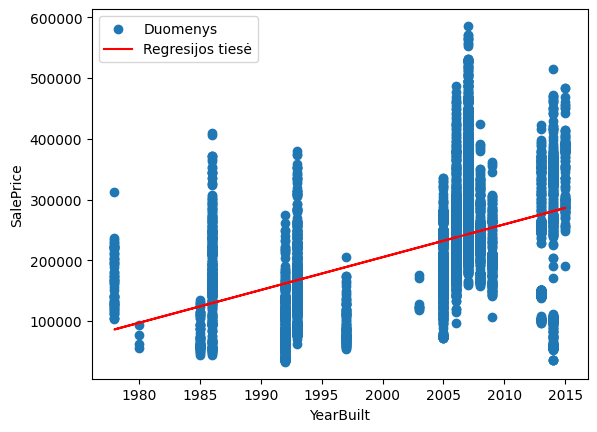

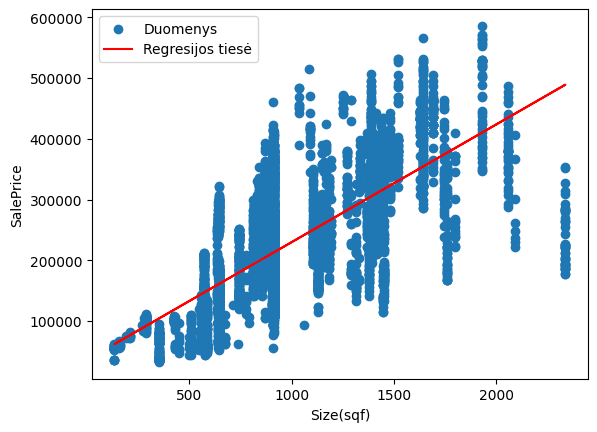

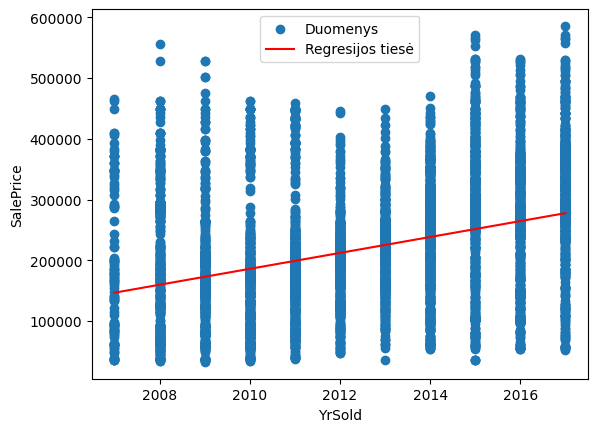

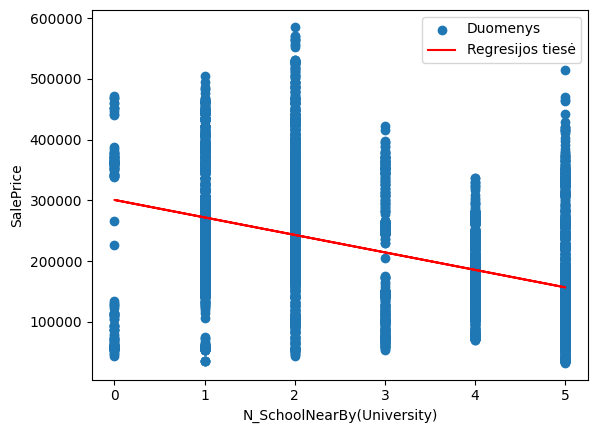

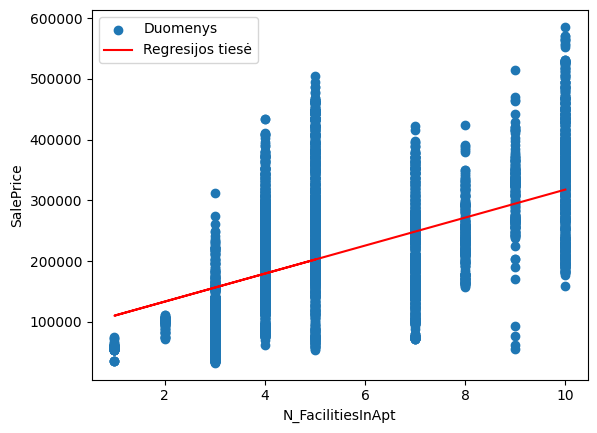

In [74]:
#grafikai
from scipy import stats
import matplotlib.pyplot as plt

def regression_line(X, Y, xlabel, ylabel):
    beta, alfa, r_val, p_val, std_err = stats.linregress(X, Y)

    def fitline(x):
        return alfa + beta * x

    line = fitline(X)

    plt.scatter(X, Y, label='Duomenys')
    plt.plot(X, line, color='r', label='Regresijos tiesė')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

X_yearbuilt = kaggle_duomenys['YearBuilt']
Y_saleprice = kaggle_duomenys['SalePrice']
regression_line(X_yearbuilt, Y_saleprice, 'YearBuilt', 'SalePrice')

X_sizesqf = kaggle_duomenys['Size(sqf)']
regression_line(X_sizesqf, Y_saleprice, 'Size(sqf)', 'SalePrice')

X_yrsold = kaggle_duomenys['YrSold']
regression_line(X_yrsold, Y_saleprice, 'YrSold', 'SalePrice')

X_schoolnearbyuni = kaggle_duomenys['N_SchoolNearBy(University)']
regression_line(X_schoolnearbyuni, Y_saleprice, 'N_SchoolNearBy(University)', 'SalePrice')

X_facilitiesapt = kaggle_duomenys['N_FacilitiesInApt']
regression_line(X_facilitiesapt, Y_saleprice, 'N_FacilitiesInApt', 'SalePrice')

In [75]:
#Regresijos modelis su Dubai Properties - Apartments dataset
dubai_duomenys = pd.read_csv('properties_data.csv')

In [76]:
dubai_duomenys

,id,neighborhood,latitude,longitude,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,quality,...,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
0,5528049,Palm Jumeirah,25.113208,55.138932,2700000,1079,2502.32,1,2,Medium,...,False,False,True,False,False,False,False,False,True,False
1,6008529,Palm Jumeirah,25.106809,55.151201,2850000,1582,1801.52,2,2,Medium,...,False,False,True,True,False,False,False,False,True,False
2,6034542,Jumeirah Lake Towers,25.063302,55.137728,1150000,1951,589.44,3,5,Medium,...,False,True,True,True,False,False,False,True,True,True
3,6326063,Culture Village,25.227295,55.341761,2850000,2020,1410.89,2,3,Low,...,False,False,False,False,False,False,False,False,False,False
4,6356778,Palm Jumeirah,25.114275,55.139764,1729200,507,3410.65,0,1,Medium,...,False,True,True,True,True,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1900,7705450,Mohammed Bin Rashid City,25.176892,55.310712,1500000,1087,1379.94,2,2,Ultra,...,False,True,True,True,True,True,True,True,True,True
1901,7706287,Mohammed Bin Rashid City,25.166145,55.276684,1230000,760,1618.42,1,2,Medium,...,False,False,True,True,False,False,False,False,True,True
1902,7706389,Dubai Creek Harbour (The Lagoons),25.206500,55.345056,2900000,1930,1502.59,3,5,Medium,...,False,False,False,True,False,False,False,False,False,False
1903,7706591,Jumeirah Village Circle,25.073858,55.229844,675000,740,912.16,1,2,Medium,...,False,True,True,True,False,False,False,False,True,True


In [78]:
dubai_duomenys.describe()

,id,latitude,longitude,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms
count,1.905000e+03,1905.000000,1905.000000,1.905000e+03,1905.000000,1905.000000,1905.000000,1905.000000
mean,7.573308e+06,25.116538,55.212338,2.085830e+06,1417.050394,1327.243785,1.793176,2.512861
std,1.925252e+05,0.062647,0.068794,2.913200e+06,891.487639,668.473559,0.949489,1.063117
min,5.528049e+06,24.865992,55.069311,2.200000e+05,294.000000,361.870000,0.000000,1.000000
25%,7.560167e+06,25.072791,55.145389,8.900000e+05,840.000000,870.920000,1.000000,2.000000
50%,7.631829e+06,25.096700,55.207506,1.400000e+06,1271.000000,1169.590000,2.000000,2.000000
75%,7.670328e+06,25.188130,55.271797,2.200000e+06,1703.000000,1622.500000,2.000000,3.000000
max,7.706643e+06,25.273623,55.441623,3.500000e+07,9576.000000,4805.870000,5.000000,6.000000


In [89]:
X = dubai_duomenys[['latitude', 'longitude', 'size_in_sqft', 'price_per_sqft', 'no_of_bedrooms']]
Y = dubai_duomenys['price']

In [90]:
X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()
reg.summary()

#R reikšmė 0.898, visos p reikšmės lygios 0, matome kad su šituo duomenu rinkiniu ir pasirinktais kintamaisiais
#gauname labai tikslų ir sėkmingą modelį

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     3337.
Date:                Tue, 12 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:49:39   Log-Likelihood:                -28885.
No. Observations:                1905   AIC:                         5.778e+04
Df Residuals:                    1899   BIC:                         5.782e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -9.098e+07   1.74e+07     -5.230      0.000   -1.25e+08   -5.69e+07
latitude       -8.264e+06   4.97e+05    -16.624      0.000   -9.24e+06   -7.29e+06
longitude       5.341e+06   4.14e+05     12.914      0.000    4.53e+06    6.15e+06
size_in_sqft    2700.9962     39.527     68.333      0.000    2623.475    2778.517
price_per_sqft  2358.9228     38.589     61.130      0.000    2283.242    2434.604
no_of_bedrooms -6.787e+05   3.58e+04    -18.964      0.000   -7.49e+05   -6.09e+05
==============================================================================
Omnibus:                      756.517   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            59606.784
Skew:                           0.962   Prob(JB):                         0.00
Kurtosis:                      30.336   Cond. No.                     1.75e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.75e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""